In [12]:
# Imports

import pandas as pd
import numpy as np
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data

train = pd.read_csv('train.csv', encoding='utf-8')

In [4]:
train.shape

(7274, 3)

In [5]:
train.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [6]:
train.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

In [7]:
train.dropna(inplace=True)

In [8]:
train.isnull().sum()

tweet_id     0
tweet        0
sentiment    0
dtype: int64

In [161]:
train.shape

(7273, 3)

In [61]:
# Delete ItemID

#train.drop('ItemID', axis=1, inplace=True)

In [9]:
targetsentiment = train.groupby('sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
#temp.style.background_gradient(cmap='Purples')
targetsentiment

,sentiment,tweet
1,1,4310
2,2,2382
0,0,456
3,3,125


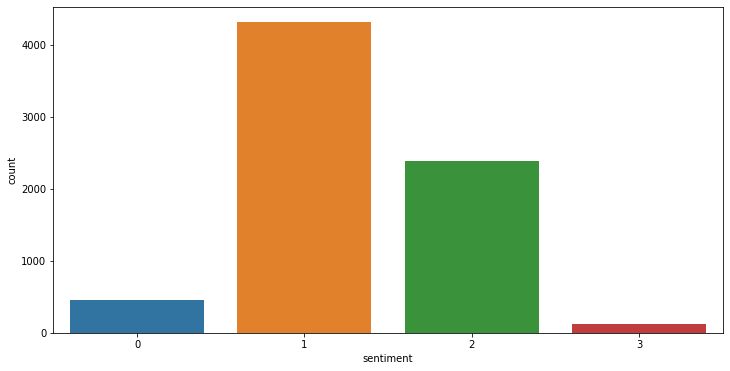

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=train)

In [13]:
fig = go.Figure(go.Funnelarea(
    text =targetsentiment.sentiment,
    values = targetsentiment.tweet,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

NameError: name 'go' is not defined

In [14]:
train.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [15]:
import re
from string import punctuation

In [16]:
train['tweet']

0       #sxswnui #sxsw #apple defining language of tou...
1       Learning ab Google doodles! All doodles should...
2       one of the most in-your-face ex. of stealing t...
3       This iPhone #SXSW app would b pretty awesome i...
4       Line outside the Apple store in Austin waiting...
                              ...                        
7269    @mention Google plze Tammi.  I'm in middle of ...
7270    RT @mention ÷¼ Are you all set? ÷_ {link} ÷...
7271    RT @mention Aha! Found proof of lactation room...
7272    We just launched our iPad app at #SXSW! Get al...
7273    The next fin serv battle is vs Apple, GOOG, Mo...
Name: tweet, Length: 7273, dtype: object

In [17]:
all_sentiments1 = '\n'.join(train['tweet'])

In [18]:
all_sentiments1

"#sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller\nLearning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw\none of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot;  {link}\nThis iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork\nLine outside the Apple store in Austin waiting for the new iPad #SXSW  {link}\n#technews One lone dude awaits iPad 2 at Apple\x89Ûªs SXSW store {link} #Tech_News #Apple #iPad_2 #SXSW #tablets #tech\nSXSW Tips, Prince, NPR Videos, Toy Shopping With Zuckerberg.\r\n{link}  #sxsw  #ipad\nNU user RT @mention New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW sponsored by #Mashable\nFree #SXSW sampler on iTunes {link} #FreeMusic\nI think I might go all weekend without seeing th

In [33]:

def remove_hash(text):
    hash_pat = r'#'
    return re.sub(hash_pat, ' ', text)
def remove_mention(text):
    mention_pat = r'@mention|@[a-z]+'
    return re.sub(mention_pat, ' ', text, flags=re.I)
def remove_short_link(text):
    short_link_pat = r"bit\.ly/[a-z0-9/\-:\.=%;,\+\*())&\$!@\[\]#\?~_\.']*"
    return re.sub(short_link_pat, ' ', text, flags=re.I) 
def remove_http_link(text):
    link_permit = r"[a-z0-9/\-:\.=%;,\+\*())&\$!@\[\]#\?~_\.']"
    http_link_pat = r"http[s]?://"+link_permit+"+|//"+link_permit+"+|[\w\.]+\.[a-z]+/"+link_permit+"+" 
    return re.sub(http_link_pat, ' ', text, flags=re.I)
def remove_sub_link(text):
    link_pat = r'{link}'
    return re.sub(link_pat, ' ', text, flags=re.I)
def remove_html_char(text):
    html_char_pat = r'&[a-z]+;'
    return re.sub(html_char_pat, ' ', text, flags=re.I)    
def remove_date(text):
    pipe = r'|'
    date_pat_mon = str()
    months =   [r'January',
                r'February',
                r'March',
                r'April',
                r'May',
                r'June',
                r'July',
                r'August',
                r'September',
                r'October',
                r'November',
                r'December']
    for month in months:
        date_pat_mon = date_pat_mon + month+r' \d\d, \d\d\d\d|'
        date_pat_mon = date_pat_mon + month[:3]+r' \d\d, \d\d\d\d|'
    date_pat_mon = date_pat_mon[:-1]
#     date_pat_mon
    date_pat =  r'\d\d/\d\d/\d\d\d\d|\d\d/\d\d/\d\d' + pipe + \
                r'\d\d\.\d\d\.\d\d\d\d|\d\d\.\d\d\.\d\d' + pipe + \
                r'\d\d-\d\d-\d\d\d\d|\d\d-\d\d-\d\d' + pipe + \
                r'{}'.format(date_pat_mon)
    date_pat = r'{}'.format(date_pat)
    return re.sub(date_pat, ' ', text, flags=re.I)
def remove_short_date(text):
    pipe = r'|'
    short_date_pat = r'[\d]?\d/\d\d[\d\d]?' + pipe + r'[\d]?\d\.\d\d[\d\d]?'
    short_date_pat = r'{}'.format(short_date_pat)
    return re.sub(short_date_pat, ' ', text)
def remove_time(text):
    pipe = r"|"
    time_pat =  r"\d\d:\d\d:\d\d pm"+pipe+\
                r"\d\d:\d\d:\d\d am"+pipe+\
                r"\d\d:\d\d:\d\d"+pipe+\
                r"\d\d:\d\d:\d\d"+pipe+\
                r"[\d]?\d:\d\d pm"+pipe+\
                r"[\d]?\d:\d\d am"+pipe+\
                r"[\d]?\d:\d\d"+pipe+\
                r"[\d]?\d:\d\d"+pipe+\
                r"[\d]?\d.\d\d pm"+pipe+\
                r"[\d]?\d.\d\d am"+pipe+\
                r"[\d]?\d.\d\d"+pipe+\
                r"[\d]?\d.\d\d"
    time_pat= r"{}".format(time_pat)
    return re.sub(time_pat, ' ', text, flags=re.I)
def remove_punctuation(text):
    punctuation_pat_s = r'\'s'
    punctuation_pat_t = r'\'t'
    punctuation_pat_d = r'\'d'
    punctuation_pat_ve = r'\'ve'
    punctuation_pat_ll = r'\'ll'
    temp = text
    temp = re.sub(punctuation_pat_s, ' ', temp, flags=re.I)
    temp = re.sub(punctuation_pat_t, 't', temp, flags=re.I)
    temp = re.sub(punctuation_pat_d, ' would', temp, flags=re.I)
    temp = re.sub(punctuation_pat_ve, ' have', temp, flags=re.I)
    temp = re.sub(punctuation_pat_ll, ' will', temp, flags=re.I)
    return temp
def remove_rt(text):
    rt_pat = r'rt'
    return re.sub(rt_pat, ' ', text, flags=re.I)


def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern,'', text)
def remove_not_alnum(text):
    """
    remove everything that is not alpha numeric
    """
    only_text = r'[^a-z0-9 ]'
    return re.sub(only_text, ' ', text, flags=re.I)  



In [34]:
def clean_text(text):
    #replace links witn {link}
    text = remove_short_link(text)
    text = remove_http_link(text)
    #remove {link}
    text = remove_sub_link(text)
    #hash
    text = remove_hash(text)
    #mention
    text = remove_mention(text)
    #rt
    text = remove_rt(text)
    #html spl chars
    text = remove_html_char(text)
    #time
    text = remove_time(text)
    #date
    text = remove_date(text)
    text = remove_short_date(text)
    #punctuation
    text = remove_punctuation(text)
    #emotjis
    text = remove_emojis(text)
    #remove spl chars
    text = remove_not_alnum(text)
    #return lower
    return text.lower()








In [53]:

'''
def performCleansingForSentimentalAnalysisWithStopWords(completeText):
#     print('##### Get Tokens in Lower Case #######')
#     #Get tokens in lower case
#     lowercasetokens = getUniqueTokens(completeText.lower())
#     unique_lowercase_tokens = len(set(lowercasetokens))
#     print('Lowercase Unique Tokens are ' + format(unique_lowercase_tokens))
#     print('##### Applying  stemming #######')
#     #Applying the stemming
#     unique_lowercase_tokens_stemmed= stemData(lowercasetokens)
#     len_unique_lowercase_tokens_stemmed = len(unique_lowercase_tokens_stemmed)
#     print('Lowercase Unique Tokens after steming  ' + format(len_unique_lowercase_tokens_stemmed))
#     print('##### Applying stop words + removing Hashtags + mentions + Links + Short Links +  #######')
 #   hashtags = find_hashtags(lowercompleteText)
 #    mentions = find_mentions(lowercompleteText)
 #   links = find_links(lowercompleteText)
#    numbers = find_numbers(lowercompleteText)
#    emojis = find_emojis(lowercompleteText)
#    punctuations = list(punctuation)
#     unique_lowercase_tokens_stemmed_without_stopwords = removeCustomStopWords(lowercompleteText,hashtags,mentions,links,numbers,emojis,punctuations)
#     return unique_lowercase_tokens_stemmed_without_stopwords
    lowercompleteText = completeText.lower()
    import re
    hastag_pat = r'#[0-9a-z_]+'
    mentions_pat = r'\@[0-9a-z]+'
    number_pat = r'-?\d+\.?\d+|-?\d+'
    links_pat= r'http://\S+|https://\S+'
    punctuations_pat= r'[.!?\\-]'
    #short_links_pat =
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    def remove_hashtags(tweet):
        return re.sub(hastag_pat, '', tweet)
    def remove_mentions(tweet):
        return re.sub(mentions_pat, '', tweet)
    def remove_numbers(tweet):
        return re.sub(number_pat, '',tweet)
    def remove_links(tweet):
        return re.sub(links_pat, '', tweet)
    def remove_emojis(tweet):
        return re.sub(emoji_pattern, '', tweet)
    def remove_shortLinks(tweet):
        return re.sub(short_links_pat, '', tweet)
    def remove_punctuations(tweet):
        return re.sub(punctuations_pat, '', tweet)
    def find_hashtags(tweet):
        return re.findall(hastag_pat, tweet)
    def find_mentions(tweet):
        return re.findall(mentions_pat, tweet, flags=re.I)
    def find_links(tweet):
        return re.findall(links_pat, tweet, flags=re.I)
    def find_numbers(tweet):
        return re.findall(number_pat, tweet)
    def find_emojis(tweet):
        return re.findall(emoji_pattern, tweet)
    
          
    lowercompleteText = remove_hashtags(lowercompleteText)
    lowercompleteText = remove_mentions(lowercompleteText)
    lowercompleteText = remove_numbers(lowercompleteText)
    lowercompleteText = remove_links(lowercompleteText)
    lowercompleteText = remove_emojis(lowercompleteText)
    lowercompleteText = remove_punctuations(lowercompleteText)
  #  lowercompleteText = getstemData(lowercompleteText)
    return  lowercompleteText
    '''

In [35]:
train['tweet'] = train['tweet'].apply(lambda x:clean_text(x))

In [36]:
train['tweet']

0        sxswnui  sxsw  apple defining language of tou...
1       learning ab google doodles  all doodles should...
2       one of the most in your face ex  of stealing t...
3       this iphone  sxsw app would b pretty awesome i...
4       line outside the apple store in austin waiting...
                              ...                        
7269      google plze tammi   i m in middle of  sxsw c...
7270            are you all set             edchat  mu...
7271        aha  found proof of lactation room  excuse...
7272    we just launched our ipad app at  sxsw  get al...
7273    the next fin serv battle is vs apple  goog  mo...
Name: tweet, Length: 7273, dtype: object

AttributeError: 'numpy.int64' object has no attribute 'value_count'

In [37]:
all_sentiments = '\n'.join(train['tweet'])

In [38]:
all_sentiments

' sxswnui  sxsw  apple defining language of touch with different dialects becoming smaller\nlearning ab google doodles  all doodles should be light  funny   innovative  with exceptions for significant occasions   googledoodle  sxsw\none of the most in your face ex  of stealing the show in yrs      at  sxsw  apple schools the mkt expe s    \nthis iphone  sxsw app would b pretty awesome if it didnt crash every 10mins during extended browsing   fuckit  illmakeitwork\nline outside the apple store in austin waiting for the new ipad  sxsw   \n technews one lone dude awaits ipad 2 at apple   s sxsw store    tech news  apple  ipad 2  sxsw  tablets  tech\nsxsw tips  prince  npr videos  toy shopping with zuckerberg       sxsw   ipad\nnu user     new  ubersocial for  iphone now in the app store includes uberguide to  sxsw sponsored by  mashable\nfree  sxsw sampler on itunes    freemusic\ni think i might go all weekend without seeing the same ipad case twice     sxsw\n    official  sxsw app    sxs

In [39]:
from nltk.corpus import stopwords
import nltk

#from string import punctuation
from nltk.stem.porter import *
stop_words = list(set(stopwords.words('english')))
train['tokenized_text'] = [nltk.word_tokenize(x) for x in train['tweet']]

train['tokenized_text'] = train['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])


In [40]:
train.head()

,tweet_id,tweet,sentiment,tokenized_text
0,1701,sxswnui sxsw apple defining language of tou...,1,"[sxswnui, sxsw, apple, defining, language, tou..."
1,1851,learning ab google doodles all doodles should...,1,"[learning, ab, google, doodles, doodles, light..."
2,2689,one of the most in your face ex of stealing t...,2,"[one, face, ex, stealing, show, yrs, sxsw, app..."
3,4525,this iphone sxsw app would b pretty awesome i...,0,"[iphone, sxsw, app, would, b, pretty, awesome,..."
4,3604,line outside the apple store in austin waiting...,1,"[line, outside, apple, store, austin, waiting,..."


In [41]:
from collections import Counter

In [42]:
top= Counter([item for sublist in train['tokenized_text'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']

In [43]:
temp

,Common_words,count
0,sxsw,7709
1,google,2113
2,ipad,2010
3,apple,1884
4,iphone,1276
5,store,1205
6,2,934
7,new,864
8,austin,794
9,app,672


In [44]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image

In [45]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [187]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [46]:
Negative_sent = train[train['sentiment']==0]
Neutral_sent = train[train['sentiment']==1]
Positive_sent = train[train['sentiment']==2]
Canttell_sent = train[train['sentiment']==3]

                     

In [47]:
Negative_sent.head()

,tweet_id,tweet,sentiment,tokenized_text
3,4525,this iphone sxsw app would b pretty awesome i...,0,"[iphone, sxsw, app, would, b, pretty, awesome,..."
24,634,i have a 3g iphone after 3 hrs tweeting at...,0,"[3g, iphone, 3, hrs, tweeting, rise, austin, d..."
34,1178,so i went the whole day w out my laptop just...,0,"[went, whole, day, w, laptop, used, ipad, 1, t..."
50,5058,google lost its way by caring too much fo...,0,"[google, lost, way, caring, much, business, vs..."
63,2435,i composed a tweet so acerbic and cynical abou...,0,"[composed, tweet, acerbic, cynical, ipad, user..."


In [50]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['tokenized_text'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Greens')

,Common_words,count
0,sxsw,467
1,ipad,159
2,iphone,130
3,google,119
4,apple,100
5,2,59
6,app,50
7,store,38
8,like,35
9,new,31


In [51]:
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most Commmon negative Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [52]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['tokenized_text'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,sxsw,2518
1,ipad,823
2,apple,743
3,google,580
4,iphone,447
5,store,428
6,2,390
7,app,325
8,new,298
9,austin,232


In [53]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [54]:
#MosT common neutral words
top = Counter([item for sublist in Neutral_sent['tokenized_text'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Greens')

,Common_words,count
0,sxsw,4594
1,google,1375
2,apple,1011
3,ipad,988
4,store,722
5,iphone,673
6,new,531
7,austin,524
8,2,467
9,circles,411


In [55]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [56]:
#MosT common canttell words
top = Counter([item for sublist in Canttell_sent['tokenized_text'] for item in sublist])
temp_canttell = pd.DataFrame(top.most_common(20))
temp_canttell.columns = ['Common_words','count']
temp_canttell.style.background_gradient(cmap='Greens')

,Common_words,count
0,sxsw,130
1,ipad,40
2,google,39
3,apple,30
4,iphone,26
5,2,18
6,store,17
7,austin,13
8,like,11
9,go,9


In [57]:
fig = px.bar(temp_canttell, x="count", y="Common_words", title='Most Commmon canttell Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [58]:
raw_text = [word for word_list in train['tokenized_text'] for word in word_list]

In [59]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in train[train.sentiment != sentiment]['tokenized_text']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in train[train.sentiment == sentiment]['tokenized_text']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [60]:
Unique_Positive= words_unique(2, 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,andoid,9
1,showed,7
2,impressed,6
3,held,6
4,zomg,6
5,clever,6
6,devianta,6
7,scene,5
8,bread,5
9,pure,5


In [62]:
fig = px.treemap(Unique_Positive, path=['words'], values='count',title='Tree Of Unique Positive Words')
fig.show()

In [63]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

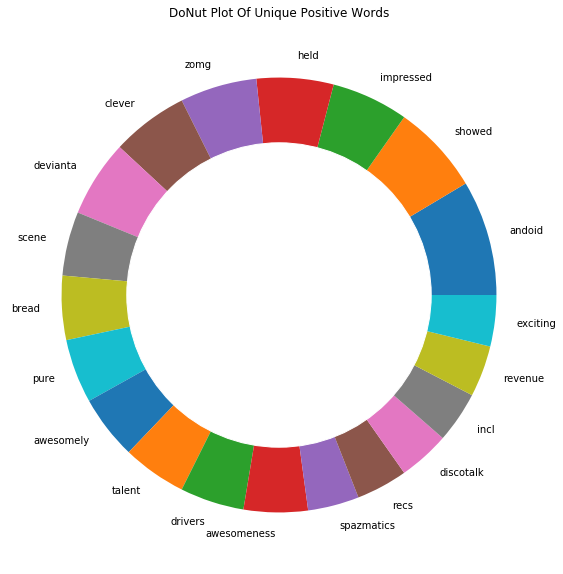

In [64]:
#from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.show()

In [65]:
Unique_Neutral= words_unique(1, 20, raw_text)
print("The top 20 unique words in neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='pink')

The top 20 unique words in neutral Tweets are:


,words,count
0,codes,40
1,valid,36
2,edchat,30
3,musedchat,28
4,newtwitter,27
5,classical,25
6,59p,22
7,groupon,18
8,cards,14
9,necro,12


In [68]:
fig = px.treemap(Unique_Neutral, path=['words'], values='count',title='Tree Of Unique neutral Words')
fig.show()

In [69]:
Unique_Negative= words_unique(0, 20, raw_text)
print("The top 20 unique words in neutral Tweets are:")
Unique_Negative.style.background_gradient(cmap='Greens')

The top 20 unique words in neutral Tweets are:


,words,count
0,hate,7
1,tag,6
2,suns,4
3,technical,4
4,images,4
5,disappointed,3
6,terrible,3
7,brick,3
8,deleting,3
9,often,2


In [71]:
fig = px.treemap(Unique_Negative, path=['words'], values='count',title='Tree Of Unique negative Words')
fig.show()

In [72]:
Unique_canttell= words_unique(3, 20, raw_text)
print("The top 20 unique words in neutral Tweets are:")
Unique_canttell.style.background_gradient(cmap='Greens')

The top 20 unique words in neutral Tweets are:


,words,count
0,chairs,1
1,bestworstthingever,1
2,mconfused,1
3,cred,1
4,selfishness,1
5,versus,1
6,masters,1
7,referential,1
8,erects,1
9,scheen,1


In [73]:
fig = px.treemap(Unique_canttell, path=['words'], values='count',title='Tree Of Unique canttell Words')
fig.show()

In [65]:
all_sentiments

"   defining language of touch with different dialects becoming smaller\nlearning ab google doodles all doodles should be light, funny &amp; innovative, with exceptions for significant occasions  \none of the most inyourface ex of stealing the show in yrs rt  &quot;at , apple schools the mkt experts&quot;  {link}\nthis iphone  app would b pretty awesome if it didn't crash every mins during extended browsing  \nline outside the apple store in austin waiting for the new ipad   {link}\n one lone dude awaits ipad  at appleâ\x89ã\x9bâªs sxsw store {link}      \nsxsw tips, prince, npr videos, toy shopping with zuckerberg\r\n{link}    \nnu user rt  new  for  now in the app store includes uberguide to  sponsored by \nfree  sampler on itunes {link} \ni think i might go all weekend without seeing the same ipad case twice \nrt  official  app â\x89ã\x9bã·sxsw goâ\x89ã\x9bâª bitly/hmiiga   \nit's official i'm buying an ipad  \nthey're giving away ipad 's, x boxes and books at   \nrt  we're official

In [8]:
all_sentiments[:50]

'                     is so sad for my APL friend..'

In [15]:
nltk.download('stopwords')

NameError: name 'nltk' is not defined

In [66]:
from nltk.corpus import stopwords
import nltk

from string import punctuation
from nltk.stem.porter import *
stop_words = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...", "n't"]

# tokenize
train['tokenized_text'] = [nltk.word_tokenize(x) for x in train['tweet']]


In [67]:
train['tokenized_text'] = train['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])

#train['tokenized_text'] = train['tokenized_text'].apply(lambda row: [word for word in row if word not in punc])

#train['tweet'] = train['tweet'].apply(lambda row: [word for word in row if word not in punc])

In [68]:
train['tokenized_text']

0       [defining, language, touch, different, dialect...
1       [learning, ab, google, doodles, doodles, light...
2       [one, inyourface, ex, stealing, show, yrs, rt,...
3       [iphone, app, would, b, pretty, awesome, crash...
4       [line, outside, apple, store, austin, waiting,...
                              ...                        
7269    [google, plze, tammi, 'm, middle, craziness, e...
7270                [rt, âã·â¼, set, âã·_, link, âã·_]
7271    [rt, aha, found, proof, lactation, room, excus...
7272    [launched, ipad, app, get, details, first, edi...
7273    [next, fin, serv, battle, vs, apple, goog, mob...
Name: tokenized_text, Length: 7273, dtype: object

In [69]:
stemmer = PorterStemmer()

train['tokenized_text'] = train['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])
train['tokenized_text'] = train['tokenized_text'].apply(lambda x: ' '.join(x))


In [70]:
train['tokenized_text']

0        defin languag touch differ dialect becom smaller
1       learn ab googl doodl doodl light funni amp inn...
2       one inyourfac ex steal show yr rt quot appl sc...
3       iphon app would b pretti awesom crash everi mi...
4        line outsid appl store austin wait new ipad link
                              ...                        
7269    googl plze tammi 'm middl crazi everyth sooooo...
7270                       rt âã·â¼ set âã·_ link âã·_
7271    rt aha found proof lactat room excus quot moth...
7272      launch ipad app get detail first edit free link
7273    next fin serv battl vs appl goog mobil oper co...
Name: tokenized_text, Length: 7273, dtype: object

In [71]:
all_words ='\n'.join([str(text) for text in train['tokenized_text']])
all_words
#all_words = '\n'.join(train['tokenized_text'])

"defin languag touch differ dialect becom smaller\nlearn ab googl doodl doodl light funni amp innov except signific occas\none inyourfac ex steal show yr rt quot appl school mkt expert quot link\niphon app would b pretti awesom crash everi min extend brows\nline outsid appl store austin wait new ipad link\none lone dude await ipad appleâ\x89ã\x9bâª sxsw store link\nsxsw tip princ npr video toy shop zuckerberg link\nnu user rt new app store includ uberguid sponsor\nfree sampler itun link\nthink might go weekend without see ipad case twice\nrt offici app â\x89ã\x9bã·sxsw goâ\x89ã\x9bâª bitly/hmiiga\noffici 'm buy ipad\n're give away ipad x box book\nrt 're offici come grill mention us w/ youâ\x89ã\x9bâªll get make iphon case\nwatch trade show floor link\nrt googl marissa mayer futur locat augment realiti contextu discoveri make smartphon smarter\ndl app get casa free mobil app avail itun app store amp android market see u\nwell yeah music gt iphon nerd rt god cute girl everywherei love i

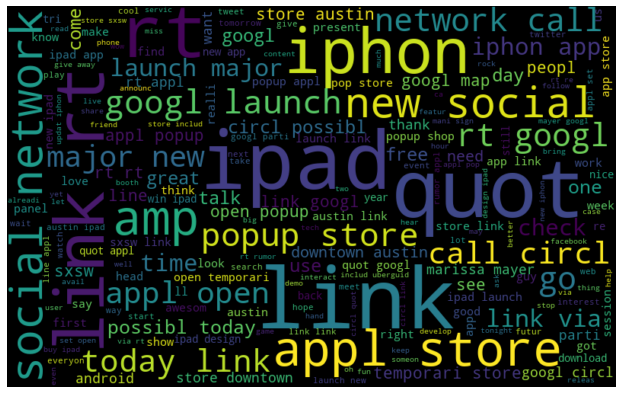

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# all the tweets

# generate wordcloud object
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# plot wordcloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
#tok = TreebankWordTokenizer()

In [10]:
# Find unique tokens

#unique_tokens = len(set(tok.tokenize(all_sentiments)))

#print(f'Unique unprocessed tokens - {unique_tokens}')

Unique unprocessed tokens - 141894


In [11]:
# Unique lower cased tokens

#unique_lower_case = [t.lower() for t in tok.tokenize(all_sentiments)]
#unique_lc_count = len(set(unique_lower_case))

#print(f'Unique lower case unprocessed tokens - {unique_lc_count}')

Unique lower case unprocessed tokens - 125465


In [12]:
#ps = PorterStemmer()

In [13]:
# Unique lower cased stemmed tokens

#unique_lc_stemmed = [ps.stem(t) for t in unique_lower_case]
#unique_lc_stem_count = len(set(unique_lc_stemmed))

#print(f'Unique lower case stemmed tokens - {unique_lc_stem_count}')

Unique lower case stemmed tokens - 115381


In [17]:

# Load stop words

#stw = stopwords.words('english')

In [18]:
# Unique lower cased stemmed w/o stop wordstokens

#unique_lc_stem_wo_stpwrds = [t for t in unique_lc_stemmed if t not in stw]
#unique_lc_stem_wo_stw_count = len(set(unique_lc_stem_wo_stpwrds))

#print(f'Unique lower case stemmed tokens without stop words - {unique_lc_stem_wo_stw_count}')

Unique lower case stemmed tokens without stop words - 115254


In [21]:
# Create a word cloud

#wc = WordCloud(stopwords=stw, background_color='white', max_words=500).generate(all_sentiments.lower())

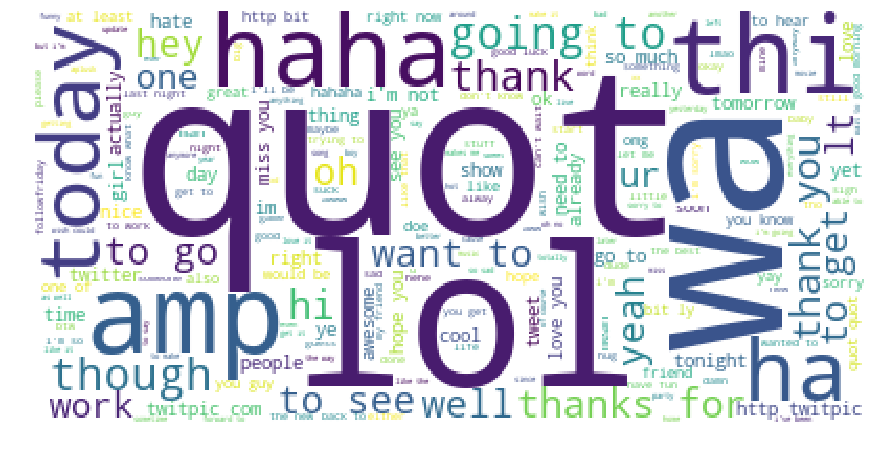

In [22]:
#%matplotlib inline
#plt.figure(figsize=(15, 10))
#plt.clf()
#plt.imshow(wc)
#plt.axis('off')
#plt.show()

## Sentiment Analysis

In [73]:
# Sentiment Analysis imports

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

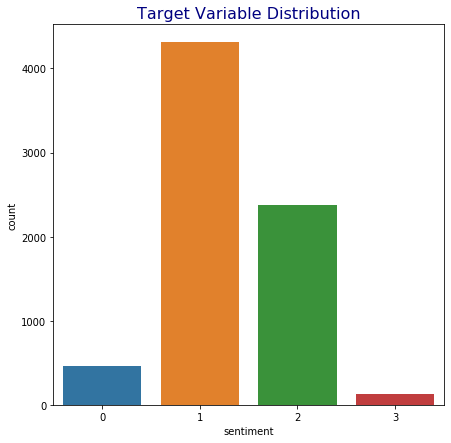

In [74]:
# Sentiment categories

plt.figure(figsize=(7, 7))
sns.countplot(train['sentiment'])
plt.title('Target Variable Distribution', fontsize=16, color='navy')
plt.show()

In [75]:
# Create X and Y
#train['tokenized_text'] = [nltk.word_tokenize(x) for x in train['tokenized_text']]

X = train['tokenized_text']
y = train['sentiment']

In [96]:
from imblearn.over_sampling import SMOTE


In [102]:
sm=SMOTE(sampling_strategy=0.25,random_state=10)

In [100]:
y.value_counts(normalize=True)*100

1    59.260278
2    32.751272
0     6.269765
3     1.718686
Name: sentiment, dtype: float64

In [103]:
X_res, y_res = sm.fit_resample(X, y)

AttributeError: 'Series' object has no attribute 'columns'

In [76]:
X.head()

0     defin languag touch differ dialect becom smaller
1    learn ab googl doodl doodl light funni amp inn...
2    one inyourfac ex steal show yr rt quot appl sc...
3    iphon app would b pretti awesom crash everi mi...
4     line outsid appl store austin wait new ipad link
Name: tokenized_text, dtype: object

In [77]:
y.head()

0    1
1    1
2    2
3    0
4    1
Name: sentiment, dtype: int64

In [78]:
# Split data in to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

In [79]:
X_train

6508                          googl map mobil look awesom
345       ellen page appear reduc iphon call heart broken
5463                    watch demo googl hotpot peopl use
5441    delight repriev spot someth plug ipad flat iro...
5585      rt hi accident took ipad set would pleas return
                              ...                        
1180    rt wan na know fast cellular signal get covera...
3442    googl buy foursquar quot knowthat interest que...
1345    alreadi pay dividend discov coupl cool app iph...
4624    googl blogger/sketchup parti unexpectedli quie...
1290    interest gt gt rt googl launch major new socia...
Name: tokenized_text, Length: 5818, dtype: object

In [86]:
cv = CountVectorizer()

In [87]:
X_train_vec = cv.fit_transform(X_train)

In [45]:
# Creating count vectorizer from training data



AttributeError: 'list' object has no attribute 'lower'

In [88]:
# Instantiate all the models

rf = RandomForestClassifier()
lr = LogisticRegression()
gb = GradientBoostingClassifier()

In [89]:
# Convert my test data into vectors for prediction

X_test_vec = cv.transform(X_test)

In [104]:
# Train the models and check CLF report



for model, name in zip([rf, lr, gb], ['Random Forest', 'Logistic Regression', 'Gradient Boosting']):
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(f'CLF report for {name}')
    print(classification_report(y_test, y_pred))

TypeError: float() argument must be a string or a number, not 'CountVectorizer'

In [91]:
tf = TfidfVectorizer()

In [90]:
from sklearn import metrics


In [93]:
X_train_vec_tf = tf.fit_transform(X_train)
X_test_vec_tf = tf.transform(X_test)

In [95]:
# Train the models and check CLF report for TFIDF vectorizer

for model, name in zip([rf, lr, gb], ['Random Forest', 'Logistic Regression', 'Gradient Boosting']):
    model.fit(X_train_vec_tf, y_train)
    y_pred = model.predict(X_test_vec_tf)
    print(f'CLF report for {name}')
    score = metrics.f1_score(y_test,y_pred,average='weighted')
    print("accuracy:   %0.3f" % score)
    print(classification_report(y_test, y_pred))

CLF report for Random Forest
accuracy:   0.648
              precision    recall  f1-score   support

           0       0.62      0.19      0.29        85
           1       0.69      0.87      0.77       882
           2       0.62      0.44      0.51       465
           3       0.00      0.00      0.00        23

    accuracy                           0.67      1455
   macro avg       0.48      0.37      0.39      1455
weighted avg       0.66      0.67      0.65      1455



C:\Users\viren\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\viren\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CLF report for Logistic Regression
accuracy:   0.631
              precision    recall  f1-score   support

           0       0.50      0.02      0.04        85
           1       0.70      0.85      0.77       882
           2       0.58      0.46      0.51       465
           3       0.00      0.00      0.00        23

    accuracy                           0.67      1455
   macro avg       0.44      0.33      0.33      1455
weighted avg       0.64      0.67      0.63      1455

CLF report for Gradient Boosting
accuracy:   0.618
              precision    recall  f1-score   support

           0       0.50      0.08      0.14        85
           1       0.67      0.91      0.77       882
           2       0.67      0.33      0.44       465
           3       0.00      0.00      0.00        23

    accuracy                           0.66      1455
   macro avg       0.46      0.33      0.34      1455
weighted avg       0.65      0.66      0.62      1455



## Cleaning with RE

,Sentiment,SentimentText,clean_text
0,0,is so sad for my APL frie...,None
1,0,I missed the New Moon trail...,None
2,1,omg its already 7:30 :O,None
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,None
4,0,i think mi bf is cheating on me!!! ...,None


['@electrograffiti']

'I am  years old'

**List of unwanted items**
1. Hashtags (#)
2. Mentions (@)
3. Links (http://, https://)
4. Short link (t.co, bit.ly)
5. Numbers
6. Emojis
7. Emoticons
8. Punctuations